# Data generation of Path Dependent Representative Volume Elements(RVEs)


## 1. Illustration of RVE

RVE simulation is an effective approach to explore constitutive laws of composites. Generally, An RVE has two material Phases which are matrix phase and fiber phase. Figure 1 gives an illustration of micro-structure of a 2D RVE.

<center><img src="figures/tasks_rve.svg" width="=80%"> </center>
<center> Figure 1: Illustration of RVEs, and list of commonalities and discrepancies on setting up tasks </center>
<br>

---

According to [Bessa et al.](https://www.sciencedirect.com/science/article/pii/S0045782516314803), **microstructures**, **material properties**, and **loading conditions** are three major variables which will influence the RVE properties. In order to exploit the advantages and limits of CDDM, several RVEs with similarities and differences are set up as different tasks. In detail, different tasks have different microstructures and material properties and apply the same dependent paths to generate the learning dataset


## 2. Tasks set up

From Figure 1, it can be seen that the microstructure of an RVE is controlled by four factors which are size of the square, volume fraction of fiber phase, and distribution parameters for generating fibers. Meanwhile, the material properties of fiber and matrix phases also influence the performance of RVEs significantly.
<br>
Therefore, several designated microstructures and material properties are given as the design variables for generating different tasks.

### 2.1 Design variables


#### 2.1.1. microstructure configurations:

> Configuration (a):  
> $$v_{frac} = 0.45 , L=0.048 , R_{mu}=0.01, R_{std}=0.003$$

> Configuration (b):
> $$v_{frac} = 0.30,  L=0.048 , R_{mu}=0.003, R_{std}=0.0$$

> Configuration (c):
> $$v_{frac} = 0.15,  L=0.048 , R_{mu}=0.0015, R_{std}=0.00005$$

Figure 2 plots different configurations of microstructure:

<center><img src="figures/tasks_microstructures.svg" width="=80%"> </center>
<center> Figure 2: Schematics of different microstructure configurations </center>
<br>

#### 2.1.2. microstructures generation:


In [4]:
# import needed libraries
from matplotlib import pyplot as plt

# import the function for generating two-dimensional microstructure
from rvesimulator.microstructure.circle_particles import CircleParticles
# define parameters for generating a microstructure
from rvesimulator.additions.ampitudesampler import AmplitudeGenerator
from rvesimulator.benchmarks.cddm_rve import CDDM_RVE
from rvesimulator.additions.hardening_law import LinearHardeningLaw, SwiftHardeningLaw, RambergHardeningLaw

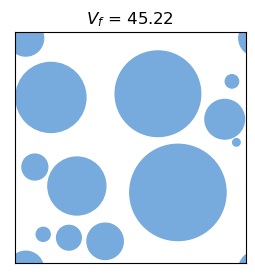

In [5]:

# the user can comment/uncoment the code to generate microstructures for configuration (a)~(c)
size = 0.048
# parameters for configuration (a)
radius_mu = 0.01
radius_std = 0.005
vol_fraction = 0.45
# parameters for configuration (b)
# radius_mu = 0.003
# radius_std = 0.0
# vol_fraction = 0.30
# parameters for configuration (c)
# radius_mu = 0.0015
# radius_std = 0.0003
# vol_fraction = 0.15


# initialize the microstructure generator
microstructrue_generator = CircleParticles(length=size,
                                           width=size,
                                           radius_mu=radius_mu,
                                           radius_std=radius_std,
                                           vol_req=vol_fraction)
microstructrue_generator.generate_microstructure(seed=17)
microstructrue_generator.plot_microstructure(figsize=(3, 3), save_figure=False)

# it is noted that the micro-structure might be different on different device because of the influence of seed

#### 2.2.1 material properties for matrix and fiber phases

1. matrix material property configurations
   The von-Mises plasticity model is selected for matrix material. Meanwhile, the young' modulus ($E_{matrix} =100 MPa $) and poisson ratio ($\nu = 0.3$) are fixed for all tasks, different hardening laws are designated.

> linear: (1) $$\sigma_{y} = 0.5+0.5\bar\epsilon$$
> swift:(2) $$\sigma_{y} = 0.5+0.5(\bar\epsilon)^{0.4}$$  
> ramberg: (3) $$\sigma_{y} = 0.5(1+ \bar\epsilon)^{1/0.4}$$
> swift: (4) $$\sigma_{y} = 3+0.5(\bar\epsilon)^{0.4}$$

2. fiber material property configurations
   The fiber material is set to be elastic, and poisson ratio are fixed to be $\nu=0.19$. Whereas, different youngs modulus are chosen.
   > (I) $E_{fiber}=1$ MPa \
   > (II) $E_{fiber} =10$ MPa\
   > (III) $E_{fiber} =1000$ MPa

### 2.3 Design of experiments of tasks

In order to set up the tasks properly, meaning different tasks have similarities and dissimilarities, 4 tasks are listed in Table 1.

<center><img src="figures/tasks_details.png" width="=100%"> </center>
<center> Table 1: Parameters configurations of different tasks  </center>
<br>

## 3. Implementation of generating simulation data of all tasks


In [6]:
# create the doe
# number of path
num_amplitude = 1
# initialize path sampler
path_sampler = AmplitudeGenerator(num_dim=3)
# get paths
paths = path_sampler.get_amplitude(
    num_amplitude=num_amplitude,
    num_control=8,
    num_steps=100,
    arg_name="strain_amplitude",
    seed=1,
)
# convert to dict
samples_dict = paths.to_dict("records")

#### 3.1 Task 1


In [7]:
# initialization
task1 = CDDM_RVE()
# update simulation info
task1.update_sim_info(mesh_partition=100,
                      strain=[0.02, 0.02, 0.02],
                      vol_req=0.45,
                      radius_mu=0.01,
                      radius_std=0.003,
                      youngs_modulus_fiber=10,
                      youngs_modulus_matrix=100,
                      hardening_law=LinearHardeningLaw(
                          a=0.5, yield_stress=0.5),
                      num_cpu=6,
                      seed=23,
                      print_info=False)
task1_results = {}
# calculate responses of simulation
for ii in range(len(samples_dict)):
    task1_results[ii] = task1.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii
    )

##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.
Abaqus Warning: Your Abaqus license will expire in 24 days.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :270.004381 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.
Abaqus Warning: Your Abaqus license will expire in 24 days.


#### 3.2 Task 2


In [8]:
# initialization
task2 = CDDM_RVE()
# update simulation info
task2.update_sim_info(mesh_partition=100,
                      strain=[0.02, 0.02, 0.02],
                      vol_req=0.30,
                      radius_mu=0.003,
                      radius_std=0.000,
                      youngs_modulus_fiber=1.0,
                      youngs_modulus_matrix=100.0,
                      hardening_law=SwiftHardeningLaw(
                          a=0.5, b=0.4, yield_stress=0.5),
                      num_cpu=6,
                      seed=17,
                      print_info=True)
task2_results = {}
# calculate responses of simulation
for ii in range(len(samples_dict)):
    task2_results[ii] = task2.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii
    )

Simulation information: 

{
    "size": 0.048,
    "radius_mu": 0.003,
    "radius_std": 0.0,
    "vol_req": 0.3,
    "youngs_modulus_matrix": 100.0,
    "poisson_ratio_matrix": 0.3,
    "youngs_modulus_fiber": 1.0,
    "poisson_ratio_fiber": 0.19,
    "hardening_table": [
        [
            0.5,
            0.5792446596230557,
            0.6045639552591273,
            0.6229754742924681,
            0.6379729661461215,
            0.6508544084136291,
            0.6622671111599604,
            0.6725874532990042,
            0.682056420302608,
            0.6908389454809087,
            0.6990535852767487,
            0.7067888311395025,
            0.7141127368338324,
            0.7210789255640928,
            0.7277305099281833,
            0.7341027460023103,
            0.7402248867962862,
            0.7461215111265916,
            0.7518134982456163,
            0.7573187569288689,
            0.7626527804403767,
            0.7678290755153834,
            0.77285949854805

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.
Abaqus Warning: Your Abaqus license will expire in 24 days.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :265.004478 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<15 out of 30 licenses remain available>.
Abaqus Warning: Your Abaqus license will expire in 24 days.


### 3.3 Task 3


In [10]:
# initialization
task3 = CDDM_RVE()
# update simulation info
task3.update_sim_info(mesh_partition=100,
                      strain=[0.02, 0.02, 0.02],
                      vol_req=0.15,
                      radius_mu=0.0015,
                      radius_std=0.0003,
                      youngs_modulus_fiber=1000.0,
                      youngs_modulus_matrix=100.0,
                      hardening_law=RambergHardeningLaw(
                          a=0.5, b=0.4, yield_stress=0.5),
                      num_cpu=6,
                      seed=17,
                      print_info=True)
task3_results = {}
# calculate responses of simulation
for ii in range(len(samples_dict)):
    task3_results[ii] = task3.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii
    )

Simulation information: 

{
    "size": 0.048,
    "radius_mu": 0.0015,
    "radius_std": 0.0003,
    "vol_req": 0.15,
    "youngs_modulus_matrix": 100.0,
    "poisson_ratio_matrix": 0.3,
    "youngs_modulus_fiber": 1000.0,
    "poisson_ratio_fiber": 0.19,
    "hardening_table": [
        [
            0.5,
            0.5062734570190611,
            0.512593906055271,
            0.5189614638594022,
            0.5253762468935953,
            0.5318383713334871,
            0.5383479530703168,
            0.5449051077130023,
            0.5515099505901957,
            0.5581625967523094,
            0.564863160973523,
            0.5716117577537604,
            0.5784085013206498,
            0.5852535056314538,
            0.5921468843749835,
            0.5990887509734836,
            0.6060792185845016,
            0.6131184001027299,
            0.6202064081618314,
            0.6273433551362393,
            0.6345293531429418,
            0.6417645140432402,
            0.6490489

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<15 out of 30 licenses remain available>.
Abaqus Warning: Your Abaqus license will expire in 24 days.


abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus lic

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<14 out of 30 licenses remain available>.
Abaqus Warning: Your Abaqus license will expire in 24 days.


### 3.4 taks 4


In [11]:
# initialization
task4 = CDDM_RVE()
# update simulation info
task4.update_sim_info(mesh_partition=100,
                      strain=[0.02, 0.02, 0.02],
                      vol_req=0.30,
                      radius_mu=0.003,
                      radius_std=0.000,
                      youngs_modulus_fiber=1.0,
                      youngs_modulus_matrix=100.0,
                      hardening_law=SwiftHardeningLaw(
                          yield_stress=3.0, a=0.5, b=0.4),
                      num_cpu=6,
                      seed=17,
                      print_info=True)
task4_results = {}
# calculate responses of simulation
for ii in range(len(samples_dict)):
    task4_results[ii] = task4.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii
    )

Simulation information: 

{
    "size": 0.048,
    "radius_mu": 0.003,
    "radius_std": 0.0,
    "vol_req": 0.3,
    "youngs_modulus_matrix": 100.0,
    "poisson_ratio_matrix": 0.3,
    "youngs_modulus_fiber": 1.0,
    "poisson_ratio_fiber": 0.19,
    "hardening_table": [
        [
            3.0,
            3.079244659623056,
            3.1045639552591275,
            3.1229754742924682,
            3.1379729661461213,
            3.150854408413629,
            3.1622671111599603,
            3.172587453299004,
            3.182056420302608,
            3.190838945480909,
            3.1990535852767485,
            3.2067888311395025,
            3.2141127368338323,
            3.221078925564093,
            3.2277305099281834,
            3.23410274600231,
            3.240224886796286,
            3.2461215111265918,
            3.251813498245616,
            3.2573187569288686,
            3.262652780440377,
            3.267829075515383,
            3.272859498548054,
        

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<14 out of 30 licenses remain available>.
Abaqus Warning: Your Abaqus license will expire in 24 days.


abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus license is not enough,waiting for license authorization
under modeling and meshing
abaqus lic

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<15 out of 30 licenses remain available>.
Abaqus Warning: Your Abaqus license will expire in 24 days.


In [12]:
# function for visualize the data
def plot_path_dependent(task1_results, task2_results, task3_results, task4_results, index):
    fig, ax = plt.subplots(2, 3, figsize=(16, 6))
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xx}$ (MPa)")
    ax[0, 0].plot(
        task1_results[index]["strain"][:, 0, 0], label="task 1"
    )
    ax[0, 0].plot(
        task2_results[index]["strain"][:, 0, 0], label="task 2"
    )
    ax[0, 0].plot(
        task3_results[index]["strain"][:, 0, 0], label="task 3"
    )
    ax[0, 0].plot(
        task4_results[index]["strain"][:, 0, 0], label="task 4"
    )

    ax[0, 0].set(**pparam)
    ax[0, 0].legend()
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xy}$ (MPa)")
    ax[0, 1].plot(
        task1_results[index]["strain"][:, 0, 1], label="task 1"
    )
    ax[0, 1].plot(
        task2_results[index]["strain"][:, 0, 1], label="task 2"
    )
    ax[0, 1].plot(
        task3_results[index]["strain"][:, 0, 1], label="task 3"
    )
    ax[0, 1].plot(
        task4_results[index]["strain"][:, 0, 1], label="task 4"
    )
    ax[0, 1].set(**pparam)
    ax[0, 1].legend()
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{yy}$ (MPa)")
    ax[0, 2].plot(
        task1_results[index]["strain"][:, 1, 1], label="task 1"
    )
    ax[0, 2].plot(
        task2_results[index]["strain"][:, 1, 1], label="task 2"
    )
    ax[0, 2].plot(
        task3_results[index]["strain"][:, 1, 1], label="task 3"
    )
    ax[0, 2].plot(
        task4_results[index]["strain"][:, 1, 1], label="task 4"
    )
    ax[0, 2].set(**pparam)
    ax[0, 2].legend()
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xx}$ (MPa)")
    ax[1, 0].plot(
        task1_results[index]["stress"][:, 0, 0], label="task 1"
    )
    ax[1, 0].plot(
        task2_results[index]["stress"][:, 0, 0], label="task 2"
    )
    ax[1, 0].plot(
        task3_results[index]["stress"][:, 0, 0], label="task 3"
    )
    ax[1, 0].plot(
        task4_results[index]["stress"][:, 0, 0], label="task 4"
    )
    ax[1, 0].set(**pparam)
    ax[1, 0].legend()
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xy}$ (MPa)")
    ax[1, 1].plot(
        task1_results[index]["stress"][:, 0, 1], label="task 1"
    )
    ax[1, 1].plot(
        task2_results[index]["stress"][:, 0, 1], label="task 2"
    )
    ax[1, 1].plot(
        task3_results[index]["stress"][:, 0, 1], label="task 3"
    )
    ax[1, 1].plot(
        task4_results[index]["stress"][:, 0, 1], label="task 4"
    )
    ax[1, 1].set(**pparam)
    ax[1, 1].legend()
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{yy}$ (MPa)")
    ax[1, 2].plot(
        task1_results[index]["stress"][:, 1, 1], label="task 1"
    )
    ax[1, 2].plot(
        task2_results[index]["stress"][:, 1, 1], label="task 2"
    )
    ax[1, 2].plot(
        task3_results[index]["stress"][:, 1, 1], label="task 3"
    )
    ax[1, 2].plot(
        task4_results[index]["stress"][:, 1, 1], label="task 4"
    )
    ax[1, 2].set(**pparam)
    ax[1, 2].legend()
    plt.show()

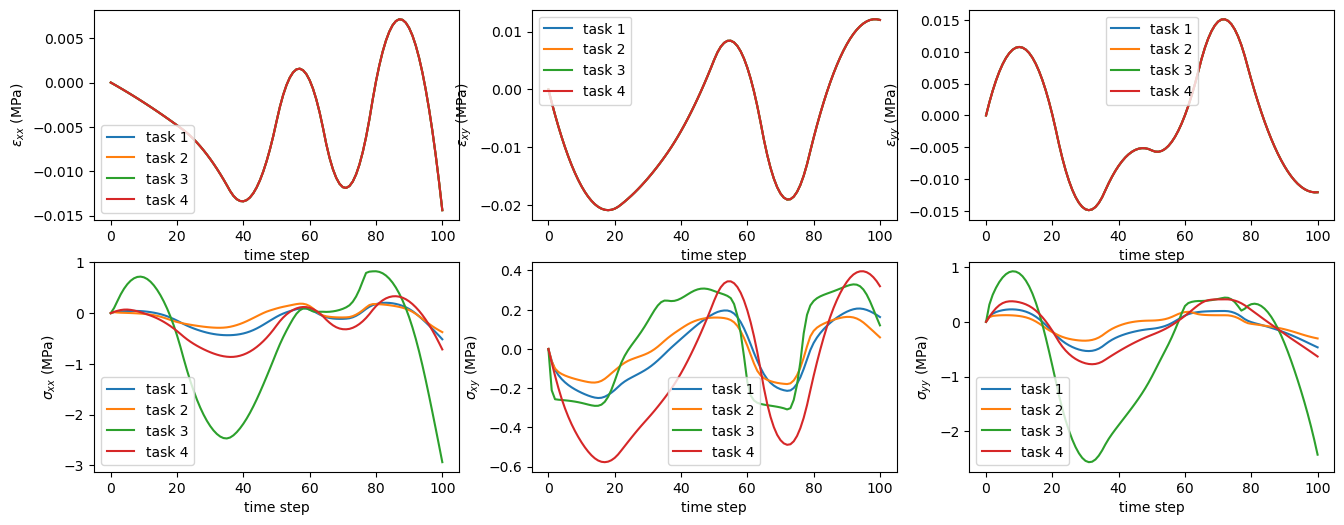

In [13]:
plot_path_dependent(task1_results=task1_results,
                    task2_results=task2_results,
                    task3_results=task3_results,
                    task4_results=task4_results,
                    index=0)